Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
#impoerting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,f1_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df = pd.read_csv('census_income.csv')

In [3]:
#checking top of the data
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
#checking total shape of the data
df.shape

(32560, 15)

In [5]:
#checking for null values in the dataset
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
#checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
#checking for unique values and their counts
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [8]:
#checking value counts for the indepedent value
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [9]:
#describing the data
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
#printing the dataset head
df.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [11]:
#printing the unique values and value counts of variables
print(df['Workclass'].unique())
print(df['Workclass'].nunique())

[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
9


In [12]:
#printing the unique values and value counts of variables
print(df['Education'].unique())
print(df['Education'].nunique())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
16


In [13]:
#printing the unique values and value counts of variables
print(df['Marital_status'].unique())
print(df['Marital_status'].nunique())

[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
7


In [14]:
#printing the unique values and value counts of variables
print(df['Occupation'].unique())
print(df['Occupation'].nunique())

[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
15


In [15]:
#printing the unique values and value counts of variables
print(df['Relationship'].unique())
print(df['Relationship'].nunique())

[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
6


In [16]:
#printing the unique values and value counts of variables
print(df['Race'].unique())
print(df['Race'].nunique())

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
5


In [17]:
#printing the unique values and value counts of variables
print(df['Sex'].unique())
print(df['Sex'].nunique())

[' Male' ' Female']
2


In [18]:
#printing the unique values and value counts of variables
print(df['Native_country'].unique())
print(df['Native_country'].nunique())

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
42


In [19]:
#checking the correlations of variables
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

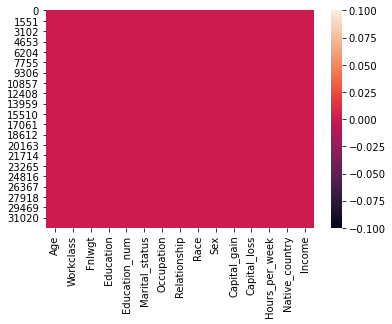

In [20]:
#plotting the heatmap for null values
sns.heatmap(df.isnull())

In [21]:
#adding the dummy column for targeted variable
df['Income']=pd.get_dummies(df['Income'],drop_first=True)


<AxesSubplot:xlabel='Income', ylabel='count'>

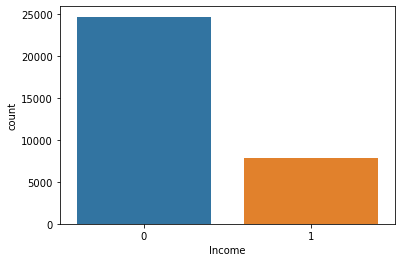

In [22]:
#plot the bar for income to check balaancing of the data
sns.countplot(df['Income'])

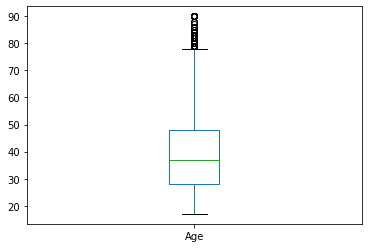

In [23]:
#checking outliers in the columns
df['Age'].plot.box() 
plt.show()

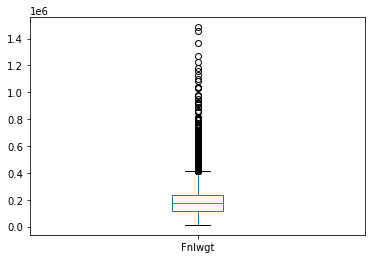

In [24]:
#checking outliers in the columns
df['Fnlwgt'].plot.box() 
plt.show()

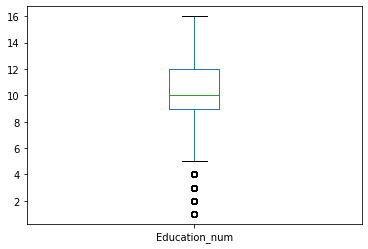

In [25]:
#checking outliers in the columns
df['Education_num'].plot.box() 
plt.show()

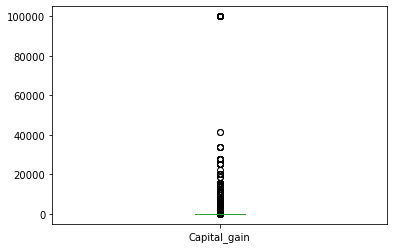

In [26]:
#checking outliers in the columns
df['Capital_gain'].plot.box() 
plt.show()

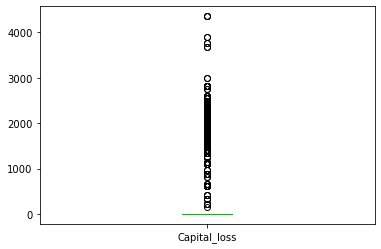

In [27]:
#checking outliers in the columns
df['Capital_loss'].plot.box() 
plt.show()

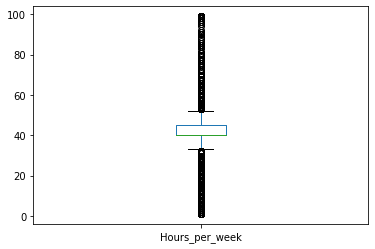

In [28]:
#checking outliers in the columns
df['Hours_per_week'].plot.box() 
plt.show()

the dataset have outliers 

<AxesSubplot:xlabel='Workclass', ylabel='count'>

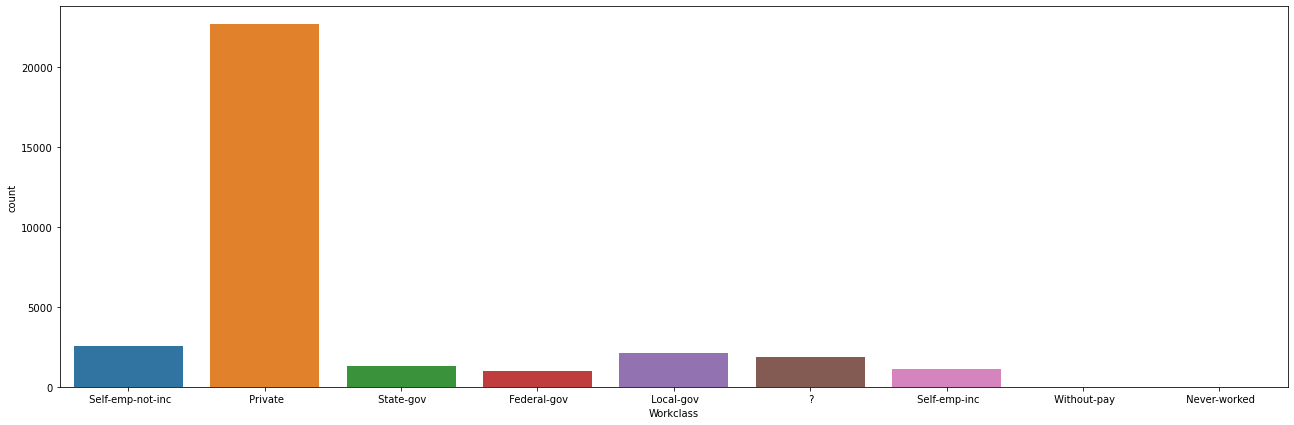

In [29]:
#ploting the bar for workclass
plt.figure(figsize=(22,7))
sns.countplot(x='Workclass',data=df)

people which are under without pay and never worked wouldn't usefull for analysis

<AxesSubplot:xlabel='Workclass', ylabel='count'>

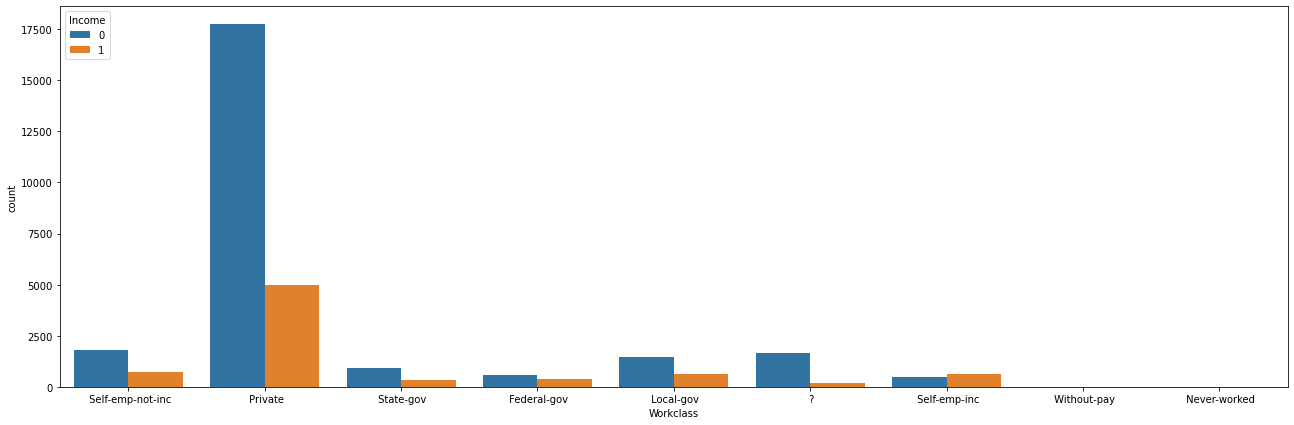

In [30]:
#plotting the bar to show the relationship between dependent and independent variable
plt.figure(figsize=(22,7))
sns.countplot(x='Workclass',data=df,hue='Income')

their have not any relationship with income with the people eho never worked and are without pay

<AxesSubplot:xlabel='Education', ylabel='count'>

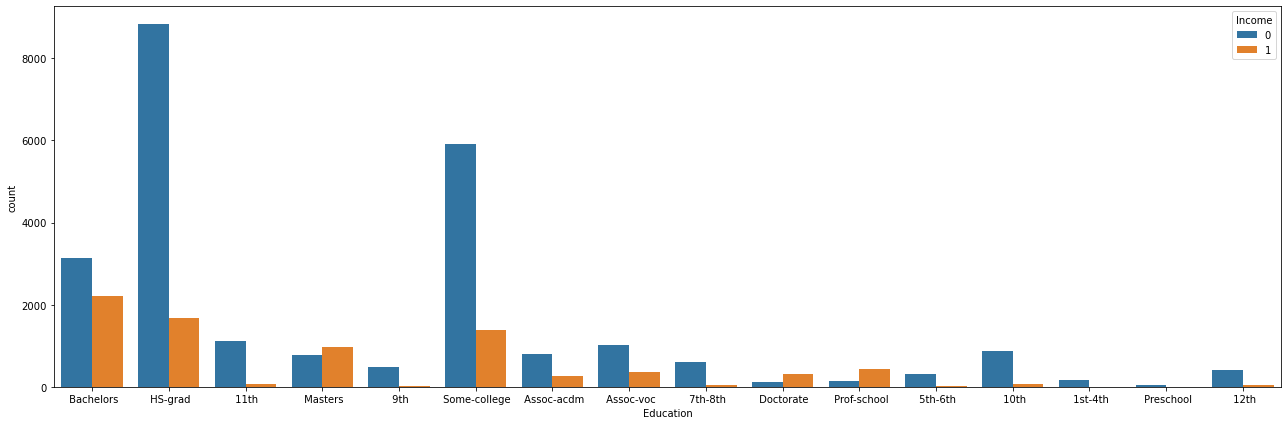

In [31]:
#plotting the bar to show the relationship between dependent and independent variable
plt.figure(figsize=(22,7))
sns.countplot(x='Education',data=df, hue='Income')

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

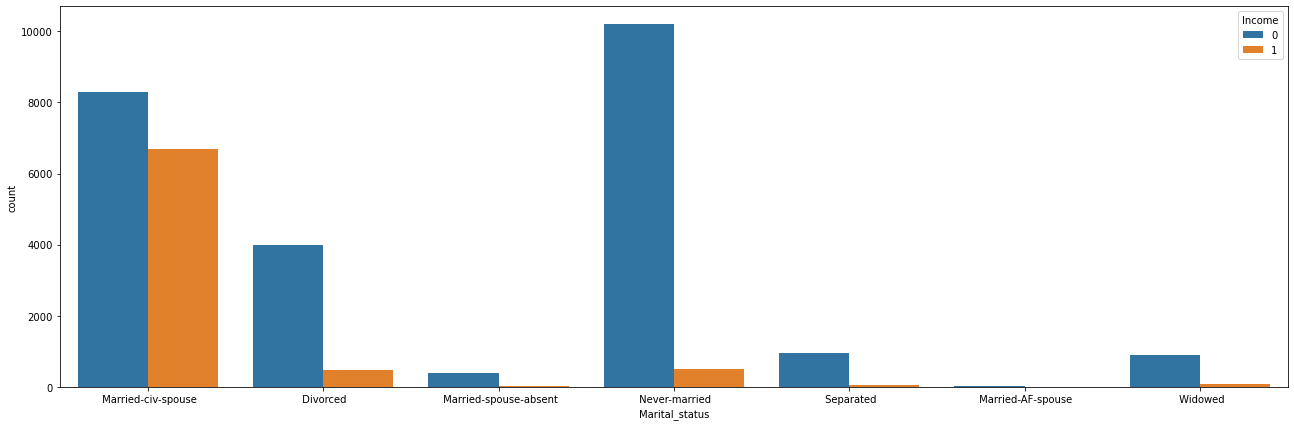

In [32]:
#plotting the bar to show the relationship between dependent and independent variable
plt.figure(figsize=(22,7))
sns.countplot(x='Marital_status',data=df,hue='Income')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

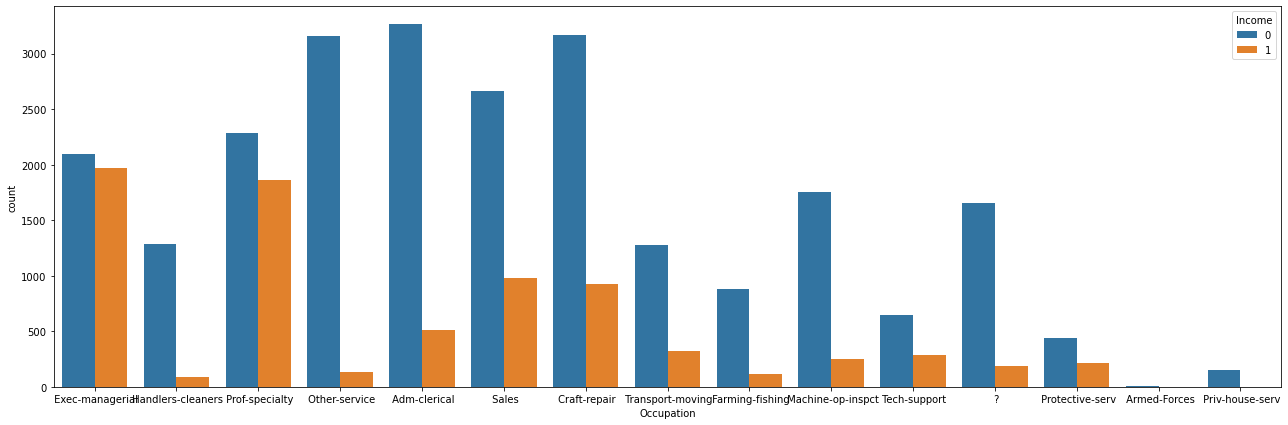

In [33]:
#plotting the bar to show the relationship between dependent and independent variable
plt.figure(figsize=(22,7))
sns.countplot(x='Occupation',data=df,hue='Income')

<AxesSubplot:xlabel='Sex', ylabel='count'>

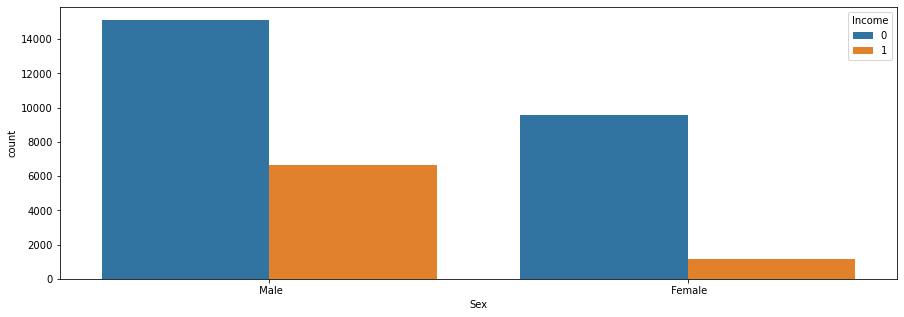

In [34]:
#plotting the bar to show the relationship between dependent and independent variable
plt.figure(figsize=(15,5))
sns.countplot(x='Sex',data=df,hue='Income')

<AxesSubplot:xlabel='Native_country', ylabel='count'>

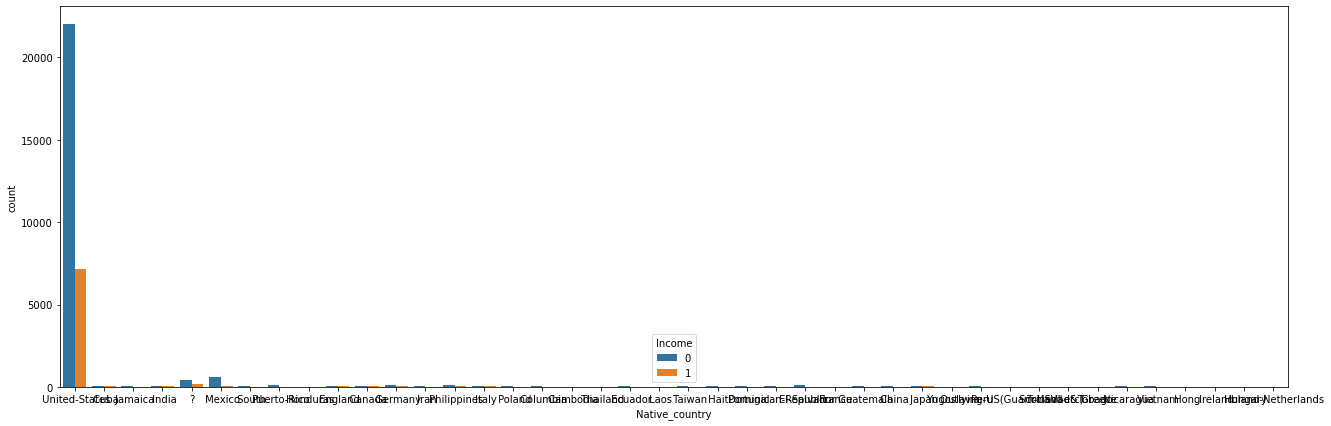

In [35]:
#plotting the bar to show the relationship between dependent and independent variable
plt.figure(figsize=(22,7))
sns.countplot(x='Native_country',data=df,hue='Income')

<AxesSubplot:>

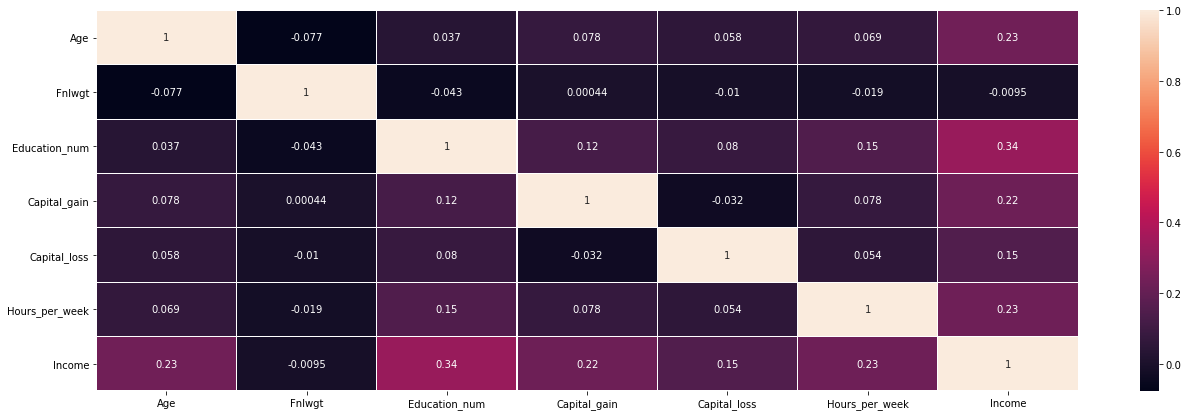

In [36]:
#making heatmap for checking correlation of data
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True, linewidths=0.1)

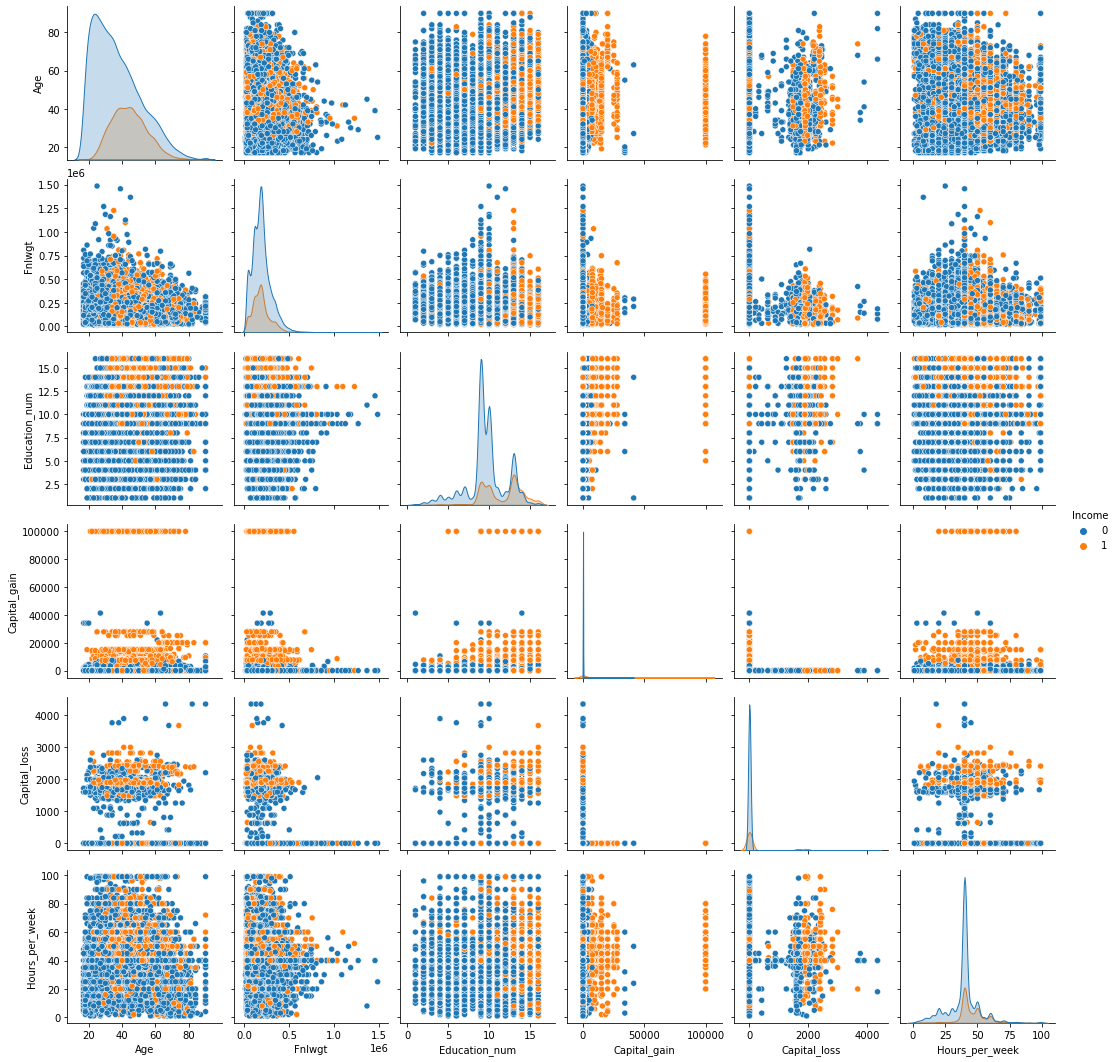

In [37]:
#making pairlot for checking relationship of data column with income
sns.pairplot(data=df,hue='Income')

In [38]:
#vchecking value counts for workclass
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [39]:
#checking unique values in particular column
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [40]:
#importing library
import re

In [41]:
#remove the special character
df['Workclass']=df['Workclass'].apply(lambda x:re.sub(' +','',str(x)))
df['Workclass'].unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [42]:
#remove the special character
df['Workclass']=np.where(df['Workclass']=='Without-pay',np.nan,df['Workclass'])
df['Workclass']=np.where(df['Workclass']=='Never-worked',np.nan,df['Workclass'])
df['Workclass']=np.where(df['Workclass']=='?',np.nan,df['Workclass'])

In [43]:
#checking shape of data
df.shape

(32560, 15)

In [44]:
##removing unusefull data
df.dropna(axis=0,inplace=True)

In [45]:
#checking new data shape
df.shape

(30703, 15)

In [46]:
#chacking charaters in th ecolumn workclass
df['Workclass'].unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', 'Self-emp-inc'], dtype=object)

In [47]:
#checking the dta in the particular colun
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [48]:
#importing library and removing unusefull dta
import re
df["Native_country"]=df["Native_country"].apply(lambda x:re.sub(' +',"",str(x)))
df["Native_country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'Italy', 'China', 'South', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [49]:
#assigning row for removal
df['native_country']=np.where(df['Native_country']=='?',np.nan,df['Native_country'])

In [50]:
#checking new shape
df.shape

(30703, 16)

In [51]:
#dropping data
df.dropna(axis=0,inplace=True)

In [52]:
#checking new shape
df.shape

(30147, 16)

In [53]:
#checking skewed data
df.skew()

Age                0.530284
Fnlwgt             1.459387
Education_num     -0.305482
Capital_gain      11.899926
Capital_loss       4.525094
Hours_per_week     0.331904
Income             1.160643
dtype: float64

In [54]:
#assigning skewed columns to new data
skew=['Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

In [55]:
#handelling the skewness
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [56]:
#ckecking skewness after removal
df.skew()

Age               0.530284
Fnlwgt           -0.838180
Education_num    -0.305482
Capital_gain      3.074560
Capital_loss      4.271155
Hours_per_week    0.331904
Income            1.160643
dtype: float64

In [57]:
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()

In [58]:
#converting the categorical column using ordinal encoder
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [59]:
#display the head of data
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,native_country
0,50,4.0,11.330348,9.0,13,2.0,3.0,0.0,4.0,1.0,0.0,0.0,13,38.0,0,38.0
1,38,2.0,12.281398,11.0,9,0.0,5.0,1.0,4.0,1.0,0.0,0.0,40,38.0,0,38.0
2,53,2.0,12.366157,1.0,7,2.0,5.0,0.0,2.0,1.0,0.0,0.0,40,38.0,0,38.0
3,28,2.0,12.732013,9.0,13,2.0,9.0,5.0,2.0,0.0,0.0,0.0,40,4.0,0,4.0
4,37,2.0,12.558780,12.0,14,2.0,3.0,5.0,4.0,0.0,0.0,0.0,40,38.0,0,38.0


In [60]:
from scipy.stats import zscore
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis = 1)]

In [61]:
#checking shape of data
df.shape

(30147, 16)

In [62]:
#checking new shape after removing outliers
new_df.shape

(24311, 16)

In [63]:
#splitting the dataset
x = df.drop('Income',axis =1)
y = df['Income']

In [64]:
#import library and transforming object into int
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [65]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
#checking accuracy score for random state
maxAccu = 0
maxRS =0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr =LogisticRegression()
    lr.fit(x_train,y_train)
    predrf= lr.predict(x_test)
    accu = accuracy_score(y_test,predrf)
    if accu >maxAccu:
        maxAccu = accu
        maxRS =i
print('best accuray score is',maxAccu,"random_state is",i)

best accuray score is 0.8186281013665915 random_state is 199


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=199)

In [68]:
#finding accuraacy score for logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('accuracy_score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score :
0.8053602229003582
[[5254  394]
 [1073  816]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      5648
           1       0.67      0.43      0.53      1889

    accuracy                           0.81      7537
   macro avg       0.75      0.68      0.70      7537
weighted avg       0.79      0.81      0.79      7537



In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
#checking cross validation score for linear regression
cvs = cross_val_score(lr,x,y,cv=5)
print('coss validation score is',cvs.mean())

coss validation score is 0.8078750714828578


In [72]:
#checking acuracy score by decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

accuracy score :
0.8048295077617089
[[4907  741]
 [ 730 1159]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5648
           1       0.61      0.61      0.61      1889

    accuracy                           0.80      7537
   macro avg       0.74      0.74      0.74      7537
weighted avg       0.81      0.80      0.81      7537



In [73]:
#checking cross validaton score
cvr= cross_val_score(dtc,x,y,cv=5)
print('cross validation score is', cvs.mean())

cross validation score is 0.8078750714828578


In [74]:
#checking accuracy score byrandom forest classifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc= rfc.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

accuracy score :
0.8519304763168369
[[5259  389]
 [ 727 1162]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5648
           1       0.75      0.62      0.68      1889

    accuracy                           0.85      7537
   macro avg       0.81      0.77      0.79      7537
weighted avg       0.85      0.85      0.85      7537



In [76]:
#checking cross validation score
cvr= cross_val_score(rfc,x,y,cv=5)
print('cross validation score is',cvr.mean())

cross validation score is 0.8533521258637424


In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
#checking accuracy by knn
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.8012471805758259
[[4929  719]
 [ 779 1110]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      5648
           1       0.61      0.59      0.60      1889

    accuracy                           0.80      7537
   macro avg       0.74      0.73      0.73      7537
weighted avg       0.80      0.80      0.80      7537



In [85]:
#checking cross validation score
cvs= cross_val_score(knn,x,y,cv=5)
print('cross validation score is',cvs.mean())

cross validation score is 0.8025012164807631


In [87]:
#checking accuracy score by adaboost calssifier
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.856308876210694
[[5332  316]
 [ 767 1122]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      5648
           1       0.78      0.59      0.67      1889

    accuracy                           0.86      7537
   macro avg       0.83      0.77      0.79      7537
weighted avg       0.85      0.86      0.85      7537



In [88]:
#checking cross validation score
cvs= cross_val_score(ad,x,y,cv=5)
print('cross validation score is', cvs.mean())

cross validation score is 0.8561717866134579


In [93]:
#checking accuracy sccore by gradiant boosting classiier
from sklearn.ensemble import GradientBoostingClassifier
gd =GradientBoostingClassifier()
gd.fit(x_train,y_train)
pred = gd.predict(x_test)
print('accuarcy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuarcy score:
0.8608199548892133
[[5377  271]
 [ 778 1111]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      5648
           1       0.80      0.59      0.68      1889

    accuracy                           0.86      7537
   macro avg       0.84      0.77      0.80      7537
weighted avg       0.86      0.86      0.85      7537



In [95]:
#checking cross validation score
cvs= cross_val_score(gd,x,y,cv=5)
print('accuracy score is',cvs.mean())

accuracy score is 0.8611804580789315


In [100]:
#saving the model
import joblib
joblib.dump(rfc,'censusinc.pkl')

['censusinc.pkl']

# prediction of income

In [101]:
#fetching saved model to predict income
model = joblib.load('censusinc.pkl')

In [104]:
pred=model.predict(x_test)
print(accuracy_score(y_test,pred)*100)

85.1930476316837


In [105]:
prediction = pd.DataFrame(pred)

In [108]:
prediction.to_csv('final.csv')
prediction

,0
0,0
1,0
2,0
3,0
4,0
...,...
7532,1
7533,0
7534,0
7535,0
